# Perceptron

## Designing a perceptron to classify logic gates: AND, OR, XOR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OR Gate
OR = pd.DataFrame(data={'x1': [0,1,0,1], 'x2': [0,0,1,1], 't': [0,1,1,1]})
OR

,x1,x2,t
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,1


In [3]:
# AND Gate
AND = pd.DataFrame(data={'x1': [0,1,0,1], 'x2': [0,0,1,1], 't': [0,0,0,1]})
AND

,x1,x2,t
0,0,0,0
1,1,0,0
2,0,1,0
3,1,1,1


In [4]:
# XOR Gate
OR = pd.DataFrame(data={'x1': [0,1,0,1], 'x2': [0,0,1,1], 't': [0,1,1,0]})
OR

,x1,x2,t
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


### Defining perceptron function

In [5]:
def perceptron(inputs, weights, bias):
    pred = []
    for x in inputs:
        net = np.dot(weights, x) + bias
        if net >= 0:
            y = +1
        else:
            y = 0
        pred.append(y)
    return pred

### AND

In [11]:
w = np.array([1, 1])
b = -3/2

In [12]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])

In [13]:
t = np.array([0,0,0,1])

In [14]:
x1 = np.linspace(-0.1,1.5,100)
x2 = -w[0]/w[1] * x1 - b/w[1]

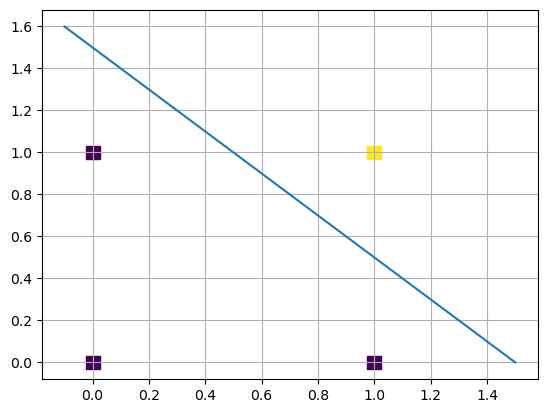

In [15]:
plt.scatter(x[:,0], x[:,1], c=t, marker="s", s=100)
plt.plot(x1, x2)
plt.grid()
plt.show()

In [16]:
x1 = np.linspace(-0.1, 1.1, 25 )
x2 = np.linspace(-0.1, 1.1, 25 )
xg, yg = np.meshgrid(x1, x2)

In [17]:
zg = perceptron(np.hstack((xg.reshape(-1,1), yg.reshape(-1,1))), w, b)

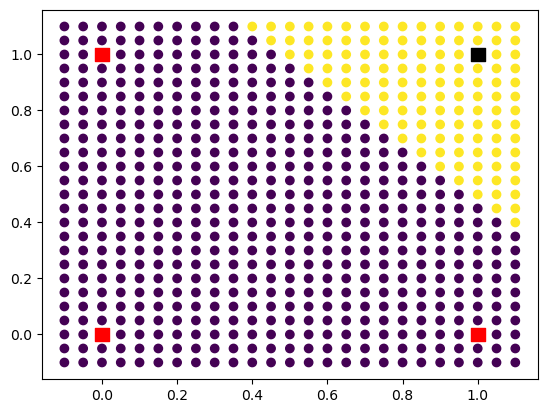

In [19]:
plt.scatter(xg, yg, c=zg)
colors = np.array(['red','red','red','black'])
plt.scatter(x[:,0], x[:,1], c=colors, marker="s", s=100)

In [20]:
class Perceptron:
    def __init__(self, dofs, epochs, alpha = 0.01):
        self.epochs = epochs
        self.alpha = alpha
        self.weights = np.zeros(dofs + 1)
        self.error = np.array([])
    
    def predict(self, inputs):
        net = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if net > 0:
            activation = 1
        else:
            activation = -1
        return activation
    
    def train(self, train_inputs, train_labels):
        for _ in range(self.epochs):
            error = 0
            for inputs, labels in zip(train_inputs, train_labels):
                preds = self.predict(inputs)
                self.weights[1:] += self.alpha * (labels - preds) * inputs
                self.weights[0] += self.alpha * (labels - preds)
                error += labels - preds
            self.error.append(error.mean())

In [24]:
perceptron = Perceptron(3, 100)

In [ ]:
df = pd.read_csv()